Parcial 2 Mineria de datos

# Primer punto

1.	Realice el proceso de verificación de calidad de datos y limpieza si es necesario realizarla. Mencione al final del punto, un resumen de los hallazgos encontrados.

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sb

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
url = 'https://raw.githubusercontent.com/DavidCastillo13/MineriaDatos_2022_2/main/student-por.csv'
data = pd.read_csv(url, sep = ';')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


1.	Realice el proceso de verificación de calidad de datos y limpieza si es necesario realizarla. Mencione al final del punto, un resumen de los hallazgos encontrados

In [2]:
data_m=data.copy()
for col in data_m.columns:
    num_missing = data_m[col].isnull().sum()
    pct_missing = np.mean(data_m[col].isnull())
    #print(col," - ",round(pct_missing*100, 2),"% - ",num_missing)
    print('{} - {}% - {}'.format(col,round(pct_missing*100, 2),num_missing))

school - 0.0% - 0
sex - 0.31% - 2
age - 0.0% - 0
address - 0.0% - 0
famsize - 0.31% - 2
Pstatus - 0.31% - 2
Medu - 0.0% - 0
Fedu - 0.0% - 0
Mjob - 0.0% - 0
Fjob - 0.15% - 1
reason - 0.0% - 0
guardian - 0.31% - 2
traveltime - 0.0% - 0
studytime - 0.0% - 0
failures - 0.0% - 0
schoolsup - 0.0% - 0
famsup - 0.31% - 2
paid - 0.0% - 0
activities - 0.0% - 0
nursery - 0.15% - 1
higher - 0.15% - 1
internet - 0.0% - 0
romantic - 0.0% - 0
famrel - 0.0% - 0
freetime - 0.0% - 0
goout - 0.0% - 0
Dalc - 0.0% - 0
Walc - 0.0% - 0
health - 0.0% - 0
absences - 0.0% - 0
G1 - 0.0% - 0
G2 - 0.0% - 0
G3 - 0.0% - 0


Hay datos faltantes, por lo que se trabaja con casos completps

In [3]:
data_m[data_m['sex'].isnull() == True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
296,GP,NaN,18,U,GT3,T,2,1,other,other,...,5,2,4,1,2,4,2,16,16,16
365,GP,NaN,17,U,GT3,A,4,3,services,services,...,5,2,2,1,2,5,14,15,14,17


In [4]:
data_m[data_m['famsize'].isnull() == True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
191,GP,M,17,U,NaN,T,3,3,other,other,...,4,3,4,1,4,4,4,11,9,10
278,GP,M,17,U,NaN,T,2,3,other,other,...,5,2,2,1,1,2,2,9,12,13


In [5]:
data_m[data_m['Pstatus'].isnull() == True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
430,MS,M,16,U,GT3,NaN,1,2,other,other,...,4,4,3,1,1,5,0,10,11,11
488,MS,F,19,U,GT3,NaN,1,1,at_home,services,...,5,3,1,1,1,3,6,7,9,9


In [6]:
data_m[data_m['Fjob'].isnull() == True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
625,MS,F,18,U,GT3,T,2,3,at_home,NaN,...,5,2,3,1,2,4,0,10,10,10


In [7]:
data_m[data_m['guardian'].isnull() == True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
139,GP,F,15,U,GT3,T,4,4,services,at_home,...,4,3,3,1,1,5,4,13,14,15
405,GP,F,19,U,LE3,A,2,3,at_home,other,...,2,2,3,3,4,5,16,10,11,11


In [8]:
data_m[data_m['famsup'].isnull() == True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
99,GP,F,16,U,GT3,T,4,3,other,at_home,...,5,3,5,1,1,3,2,12,13,13
168,GP,M,15,R,GT3,T,2,3,at_home,services,...,4,4,4,1,1,1,0,7,8,8


In [9]:
data_m[data_m['nursery'].isnull() == True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
275,GP,F,18,U,GT3,T,2,1,other,other,...,4,4,4,1,1,3,10,12,10,11


In [10]:
data_m[data_m['higher'].isnull() == True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
212,GP,F,17,U,GT3,T,4,4,services,teacher,...,4,2,4,2,3,2,30,14,15,16


Hay en total 8 patrones de valores faltantes para la base de estudiantes, y a cada uno de los estudiantes les falta una sola variable

In [11]:
print('Antes de borrar registros: ',data_m.shape)
for col in data_m.columns:
    missing = data_m[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        data_m['{}_ismissing'.format(col)] = missing
ismissing_cols = [col for col in data_m.columns if 'ismissing' in col]
data_m['num_missing'] = data_m[ismissing_cols].sum(axis=1)

Antes de borrar registros:  (649, 33)
created missing indicator for: sex
created missing indicator for: famsize
created missing indicator for: Pstatus
created missing indicator for: Fjob
created missing indicator for: guardian
created missing indicator for: famsup
created missing indicator for: nursery
created missing indicator for: higher


In [12]:
columns = list(data_m)
ind_missing = data_m[data_m['num_missing'] >= 1].index
df_less_missing_rows = data_m.drop(ind_missing, axis=0)
df_less_missing_rows = df_less_missing_rows[columns]
print('Después de borrar registros: ',df_less_missing_rows.shape)

Después de borrar registros:  (636, 42)


En total hay 649 estudiantes con datos completos, por lo que se tratara la base con estos 636 registros en principio

In [13]:
data_uwu = df_less_missing_rows

In [14]:
data_uwu[data_uwu.duplicated()] # No hay datos duplicados

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,G3,sex_ismissing,famsize_ismissing,Pstatus_ismissing,Fjob_ismissing,guardian_ismissing,famsup_ismissing,nursery_ismissing,higher_ismissing,num_missing


In [15]:
data_uwu['sex'].value_counts()

F    375
M    261
Name: sex, dtype: int64

In [16]:
data_uwu['school'].value_counts()

GP    413
MS    223
Name: school, dtype: int64

In [17]:
data_uwu['address'].value_counts()

U    440
R    196
Name: address, dtype: int64

In [18]:
data_uwu['famsize'].value_counts()

GT3    445
LE3    191
Name: famsize, dtype: int64

In [19]:
data_uwu['romantic'].value_counts() # Hay un valor para romantic donde digitaron No en mayuscula

no     401
yes    234
No       1
Name: romantic, dtype: int64

In [20]:
data_uwu['internet'].value_counts() 

yes    486
no     149
Yes      1
Name: internet, dtype: int64

In [21]:
data_uwu.at[106,'internet'] = 'yes'

In [22]:
data_uwu['internet'].value_counts() 

yes    487
no     149
Name: internet, dtype: int64

In [23]:
data_uwu.at[188,'romantic'] = 'no'

In [24]:
data_uwu['romantic'].value_counts() # Hay un valor para romantic donde digitaron No en mayuscula

no     402
yes    234
Name: romantic, dtype: int64

In [25]:
data_uwu.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,num_missing
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.0
mean,16.737421,2.514151,2.300314,1.572327,1.927673,0.221698,3.922956,3.188679,3.183962,1.507862,2.289308,3.536164,3.592767,11.418239,11.567610,11.944969,0.0
std,1.216131,1.135589,1.100923,0.752605,0.829261,0.596236,0.956721,1.053945,1.178199,0.929788,1.286372,1.449501,4.508177,2.795032,2.922649,3.368000,0.0
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,0.0
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000,0.0
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,0.0
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,25.000000,19.000000,36.000000,0.0


In [26]:
a=data_uwu[data_uwu['G1'] > 20 ].index # Hay una persona la cual tiene calificacion mayor a 20, lo cual no puede ser 

In [27]:
b=data_uwu[data_uwu['G3'] > 20 ].index # Hay una persona la cual tiene calificacion mayor a 20, lo cual no puede ser

In [28]:
x=data_uwu.drop(a, axis = 0)
x=x.drop(b,axis = 0)
columnas = list(data)
base = x[columnas]
base.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,16.735016,2.512618,2.299685,1.572555,1.927445,0.222397,3.921136,3.189274,3.182965,1.507886,2.290221,3.531546,3.569401,11.400631,11.567823,11.900631
std,1.216970,1.135663,1.099375,0.753258,0.828656,0.597046,0.957268,1.054058,1.176908,0.930831,1.288299,1.449448,4.453276,2.745164,2.916311,3.230664
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


## Resumen final del punto
* Hay datos faltantes, y si bien lo recomendable seria imputarlos, se trabaja con casos completos eliminando las filas con faltantes trabajando con 636 registros
* Hay inconcistencias en 2 registros con respecto a las notas, y en la variable romantic e internet se digito con mayuscula un valor
* No hay datos duplicados

# Segundo punto

2.	Realice un análisis exploratorio sobre las variables que considere son relevantes para el modelo, teniendo en cuenta el tipo de variable, es decir, si es cuantitativa o cualitativa/categórica. Mencione al final de punto las variables considera que son relevantes para el modelo y escoja 5 según dichos criterios.

In [29]:
base[['G1','G2','G3','absences']].describe()

,G1,G2,G3,absences
count,634.000000,634.000000,634.000000,634.000000
mean,11.400631,11.567823,11.900631,3.569401
std,2.745164,2.916311,3.230664,4.453276
min,0.000000,0.000000,0.000000,0.000000
25%,10.000000,10.000000,10.000000,0.000000
50%,11.000000,11.000000,12.000000,2.000000
75%,13.000000,13.000000,14.000000,6.000000
max,19.000000,19.000000,19.000000,32.000000


- G1 G2 y G3 se mueven entre 0 y 20, el promedio de G1 es 11.40, G2 11.56 y 11.9 para G3. Las faltas se mueven entre 0 y 32, con estudiantes que no faltaron ni una vez, pero hay uno o varios estudiantes que faltaron hasta 32 veces 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


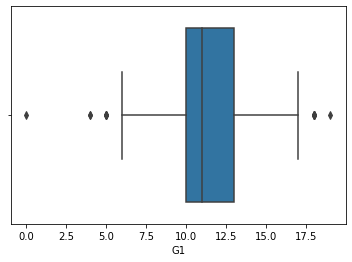

In [30]:
sb.boxplot(base['G1'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


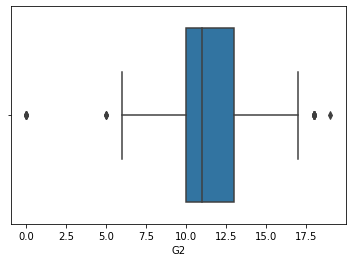

In [31]:
sb.boxplot(base['G2'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


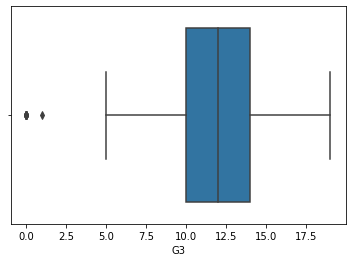

In [32]:
sb.boxplot(base['G3'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


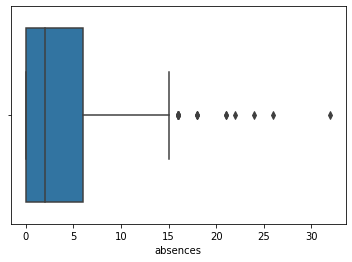

In [33]:
sb.boxplot(base['absences'])

Asumiendo que G1, G2, G3 Y absences sigan una distribucion normal, con respecto a valores atipicos
- G1 tiene 5 
- G2 tiene 4 
- G3 tiene 2
- absences tiene 7 

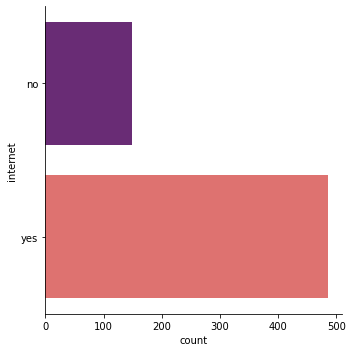

In [34]:
sb.catplot(
    data=base, y="internet", kind="count",
    palette="magma"
) # Los pesos

In [35]:
base['internet'].value_counts()

yes    485
no     149
Name: internet, dtype: int64

Hay 485 estudiantes que tienen internet, y 149 que no lo tienen

In [36]:
base[base['internet'] == 'no'][['G1','G2','G3','absences']].describe()

,G1,G2,G3,absences
count,149.000000,149.000000,149.000000,149.000000
mean,10.751678,10.818792,11.060403,3.093960
std,2.908297,3.236309,3.456737,3.687712
min,0.000000,0.000000,0.000000,0.000000
25%,9.000000,9.000000,10.000000,0.000000
50%,10.000000,11.000000,11.000000,2.000000
75%,13.000000,13.000000,13.000000,5.000000
max,18.000000,19.000000,19.000000,24.000000


In [37]:
base[base['internet'] == 'yes'][['G1','G2','G3','absences']].describe()

,G1,G2,G3,absences
count,485.000000,485.000000,485.000000,485.000000
mean,11.600000,11.797938,12.158763,3.715464
std,2.664583,2.773918,3.116464,4.656980
min,4.000000,0.000000,0.000000,0.000000
25%,10.000000,10.000000,10.000000,0.000000
50%,12.000000,12.000000,12.000000,2.000000
75%,14.000000,14.000000,14.000000,6.000000
max,19.000000,18.000000,19.000000,32.000000


Los estudiantes los cuales tienen internet, en promedio estan pasando la asignatura en G3, pero los estudiantes que no tienen internet, en promedio no estan pasando la materia si se asume 12 como calificacion para pasar

In [38]:
si=base[base['internet'] == 'yes'][['G1','G2','G3','absences']]
si[si['absences'] > 0].describe()

,G1,G2,G3,absences
count,302.000000,302.000000,302.000000,302.000000
mean,11.274834,11.543046,11.993377,5.966887
std,2.580394,2.578302,2.677572,4.625392
min,4.000000,5.000000,5.000000,1.000000
25%,9.000000,10.000000,10.000000,2.000000
50%,11.000000,11.000000,12.000000,4.000000
75%,13.000000,13.000000,14.000000,8.000000
max,18.000000,18.000000,19.000000,32.000000


In [39]:
no=base[base['internet'] == 'no'][['G1','G2','G3','absences']]
no[no['absences'] > 0].describe()

,G1,G2,G3,absences
count,92.000000,92.000000,92.000000,92.000000
mean,10.478261,10.706522,11.195652,5.010870
std,2.649811,2.130563,2.103054,3.522282
min,0.000000,5.000000,7.000000,1.000000
25%,9.000000,9.000000,10.000000,2.000000
50%,10.000000,11.000000,11.000000,4.000000
75%,12.000000,12.000000,12.000000,6.000000
max,17.000000,17.000000,18.000000,24.000000


Y si dentro de los estudiantes que han faltado a clases al menos una vez, en promedio los estudiantes que tienen internet siguen pasando la materia, mientras que por otro lado los que tienen internet y faltan al menos una vez, no pasan la materia si se asume 12 como calificacion para pasar

In [40]:
base[['G1','G2','G3','absences','age']].corr()

,G1,G2,G3,absences,age
G1,1.000000,0.865052,0.825496,-0.163035,-0.179549
G2,0.865052,1.000000,0.917484,-0.133317,-0.110216
G3,0.825496,0.917484,1.000000,-0.100596,-0.109170
absences,-0.163035,-0.133317,-0.100596,1.000000,0.144484
age,-0.179549,-0.110216,-0.109170,0.144484,1.000000


La correlacion de Person como se esperaba entre G1, G2 y G3 es alta, y por otro lado la correlacion con las faltas es negativa y debil, es decir, a mayor Puntuacion definitiva le corresponden mayores fallas, y por otro lado la edad tambien tiene una relacion inversa con la nota final

Variables que escogidas para el modelo

- G2
- G3
- absences
- internet
- Edad

G1 no se escogio por la alta correlacion entre G2 y G1, y la razon por la cual se trata con G2 es por que tiene mayor correlacion con G3

# Tercer punto

En base a lo anterior, se quiere ajustar un modelo donde G3, sea explicado por medio de G2, absences, la edad y una variable dummmy si tiene internet o no

In [41]:
internet=pd.get_dummies(base['internet'] , drop_first=True) # Creando la Dummy donde 1 es Verdadero tiene internet
data2=pd.concat([base,internet], axis = 1)
data2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,yes
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,1
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,1
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,0
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,1


In [42]:
X = data2[['G2','absences','age']].values
Y = data2[['G3']].values
X

array([[11,  4, 18],
       [11,  2, 17],
       [13,  6, 15],
       ...,
       [12,  6, 18],
       [10,  6, 17],
       [11,  4, 18]])

In [43]:
from numpy.lib.function_base import median
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
X = np.hstack([X,data2[['yes']].values]) # Como estandarizar una dummy no tendria sentido, estandarizamos las otras 3 variables y añadimos la dummy
X

array([[-0.19485975,  0.09676906,  1.0402749 ,  0.        ],
       [-0.19485975, -0.3526931 ,  0.21791295,  1.        ],
       [ 0.49147959,  0.54623123, -1.42681096,  1.        ],
       ...,
       [ 0.14830992,  0.54623123,  1.0402749 ,  0.        ],
       [-0.53802942,  0.54623123,  0.21791295,  1.        ],
       [-0.19485975,  0.09676906,  1.0402749 ,  1.        ]])

In [44]:
# Cambiando alphas, y particiones con la base completa, en este caso 0.01 y con una tolerancia para el algoritmo de 1e-4 
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
lassoregcv1 = Lasso(alpha=0.01, random_state=1,tol = 1e-4 ) # Dandole alphas aleatorios, una semilla y cv
lassoregcv1.fit(X, Y)

Lasso(alpha=0.01, random_state=1)

In [45]:
print(lassoregcv1.intercept_,lassoregcv1.coef_)

[11.86852361] [ 2.9545997   0.06185258 -0.02589967  0.04197119]


El modelo de la forma uno queda escrito como 

$Y = 11.868523613766843 + [2.9545997\cdot_{X_1}  + 0.06185258\cdot{X_2} -0.02589967\cdot{X_3} + 0.04197119\cdot{X_4}]+ϵ$ 

In [46]:
# Cambiando alphas y particiones de la base completa, en este caso 0.001 y con la tolerancia de 1e-3
lassoregcv2 = Lasso(alpha=0.001, random_state=1,tol = 1e-3 ) # Dandole alphas aleatorios, una semilla y cv
lassoregcv2.fit(X, Y)

Lasso(alpha=0.001, random_state=1, tol=0.001)

In [47]:
print(lassoregcv2.intercept_,lassoregcv2.coef_)

[11.83275982] [ 2.96099566  0.07197011 -0.03587038  0.08872222]


El modelo de la forma 2 queda escrito como 

$Y = 11.83275982 + 2.96099566\cdot_{X_1}  +  0.07197011\cdot{X_2} -0.03587038\cdot{X_3} +0.08872222\cdot{X_4}+ϵ$ 

In [48]:
# Cambiando alphas y particiones de la base completa, en este caso 0.005 v mayor tolerancia
lassoregcv3 = Lasso(alpha=0.005, random_state=1,tol = 1e-5 ) # Dandole alphas aleatorios, una semilla y cv
lassoregcv3.fit(X, Y)

Lasso(alpha=0.005, random_state=1, tol=1e-05)

In [49]:
print(lassoregcv3.intercept_,lassoregcv3.coef_)

[11.84866013] [ 2.95817212  0.06747665 -0.03143694  0.06793706]


El modelo con las condicionesd 3 queda escrito como


In [50]:
y1_pred=lassoregcv1.predict(X)
y2_pred=lassoregcv2.predict(X)
y3_pred=lassoregcv3.predict(X)

In [51]:
from sklearn import metrics
import numpy as np
print('R2:', metrics.r2_score(Y,y1_pred)*100)
print('MAE:', metrics.mean_absolute_error(Y, y1_pred))

R2: 84.24508870019568
MAE: 0.8107714921763283


In [52]:
from sklearn import metrics
import numpy as np
print('R2:', metrics.r2_score(Y,y2_pred)*100)
print('MAE:', metrics.mean_absolute_error(Y, y2_pred))

R2: 84.25282141494566
MAE: 0.8122080454291056


In [53]:
from sklearn import metrics
import numpy as np
print('R2:', metrics.r2_score(Y,y3_pred)*100)
print('MAE:', metrics.mean_absolute_error(Y, y3_pred))

R2: 84.25094720152376
MAE: 0.8114256077241492


* Con particion de entrenamiento

In [54]:
# Separar entre entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1) 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) # primero entrenamiento X, test en X, luego entrenamiento Y y test Y

(507, 4) (127, 4) (507, 1) (127, 1)


In [55]:
# Cambiando alphas, y particiones con la base completa, en este caso 0.01,0.004 y la tolerancia base
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LassoCV
lassoregcv1 = Lasso(alpha=0.01, random_state=1,tol = 1e-4 ) 
lassoregcv1.fit(X_train, y_train)

Lasso(alpha=0.01, random_state=1)

In [56]:
print(lassoregcv1.intercept_,lassoregcv1.coef_)

[11.85948017] [ 2.95953484  0.01565066 -0.          0.07029449]


In [57]:
print("Y = " ,float(lassoregcv1.intercept_) ,"+ ",lassoregcv1.coef_[0],"X_1","+ ",lassoregcv1.coef_[1],"X_2",lassoregcv1.coef_[2],"X_3","+ ",lassoregcv1.coef_[3],"X_4" )

Y =  11.859480165287867 +  2.9595348389683536 X_1 +  0.015650658672028715 X_2 -0.0 X_3 +  0.07029449117415575 X_4


In [58]:
# Cambiando alphas, y particiones con la base completa, en este caso 0.001 y la tolerancia de 1e-3
lassoregcv2 = Lasso(alpha=0.001, random_state=1,tol = 1e-3 ) 
lassoregcv2.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=1, tol=0.001)

In [59]:
print(lassoregcv2.intercept_,lassoregcv2.coef_)

[11.82208771] [ 2.96584719  0.02484298 -0.00557681  0.11838671]


In [60]:
print("Y = " ,float(lassoregcv2.intercept_) ,"+ ",lassoregcv2.coef_[0],"X_1","+ ",lassoregcv2.coef_[1],"X_2",lassoregcv2.coef_[2],"X_3","+ ",lassoregcv2.coef_[3],"X_4" )

Y =  11.822087708333473 +  2.9658471888225946 X_1 +  0.02484297674639303 X_2 -0.005576812302015939 X_3 +  0.11838671307903018 X_4


In [61]:
# Cambiando alphas y particiones de la base completa, en este caso 0.005 v mayor tolerancia
lassoregcv3 = Lasso(alpha=0.005, random_state=1,tol = 1e-5 ) 
lassoregcv3.fit(X_train, y_train)

Lasso(alpha=0.005, random_state=1, tol=1e-05)

In [62]:
print(lassoregcv3.intercept_,lassoregcv3.coef_)

[11.83865826] [ 2.96318573e+00  2.05162126e-02 -1.51498564e-03  9.70499440e-02]


In [63]:
print("Y = " ,float(lassoregcv3.intercept_) ,"+ ",lassoregcv3.coef_[0],"X_1","+ ",lassoregcv3.coef_[1],"X_2",lassoregcv3.coef_[2],"X_3","+ ",lassoregcv3.coef_[3],"X_4" )

Y =  11.83865825788326 +  2.9631857304699487 X_1 +  0.020516212557677882 X_2 -0.0015149856410164575 X_3 +  0.09704994402919209 X_4


In [64]:
y1_pred=lassoregcv1.predict(X_test)
y2_pred=lassoregcv2.predict(X_test)
y3_pred=lassoregcv3.predict(X_test)

In [65]:
print('R2:', metrics.r2_score(y_test,y1_pred)*100)
print('MAE:', metrics.mean_absolute_error(y_test, y1_pred))

R2: 81.83883471113562
MAE: 0.8468125205562687


In [66]:
print('R2:', metrics.r2_score(y_test,y2_pred)*100)
print('MAE:', metrics.mean_absolute_error(y_test, y2_pred))

R2: 81.86869226906872
MAE: 0.8454329241241005


In [67]:
print('R2:', metrics.r2_score(y_test,y3_pred)*100)
print('MAE:', metrics.mean_absolute_error(y_test, y3_pred))

R2: 81.85230459328908
MAE: 0.8460936427053992


# Con validacion cruzada

Dejando el alpha tomar valores 100 valores, se ajusta el modelo buscando el que tenga el mejor R^2

In [68]:
lassoregcv1 = LassoCV(n_alphas=100, random_state=1,cv=5,tol = 1e-4 ) 
lassoregcv1.fit(X_train, y_train)
lassoregcv1.alpha_

0.07268798508119621

In [69]:
print("Y = " ,float(lassoregcv1.intercept_) ,"+ ",lassoregcv1.coef_[0],"X_1","+ ",lassoregcv1.coef_[1],"X_2",lassoregcv1.coef_[2],"X_3","+ ",lassoregcv1.coef_[3],"X_4" )

Y =  11.915298747153427 +  2.8990477485294557 X_1 +  0.0 X_2 -0.0 X_3 +  0.0 X_4


In [70]:
lassoregcv2 = LassoCV(n_alphas=100, random_state=1,cv=10,tol = 1e-4 ) 
lassoregcv2.fit(X_train, y_train)
lassoregcv2.alpha_

0.04159473750519683

In [71]:
print("Y = " ,float(lassoregcv2.intercept_) ,"+ ",lassoregcv2.coef_[0],"X_1","+ ",lassoregcv2.coef_[1],"X_2",lassoregcv2.coef_[2],"X_3","+ ",lassoregcv2.coef_[3],"X_4" )

Y =  11.914592757431635 +  2.9305463668784597 X_1 +  0.0 X_2 -0.0 X_3 +  0.0 X_4


In [72]:
y1_pred=lassoregcv1.predict(X_test)
y2_pred=lassoregcv2.predict(X_test)

In [73]:
print('R2:', metrics.r2_score(y_test,y1_pred)*100)
print('MAE:', metrics.mean_absolute_error(y_test, y1_pred))

R2: 81.78521649536883
MAE: 0.8455561968881866


In [74]:
print('R2:', metrics.r2_score(y_test,y2_pred)*100)
print('MAE:', metrics.mean_absolute_error(y_test, y2_pred))

R2: 81.78979557201376
MAE: 0.8476643842290227


# Analizando



- El mejor modelo segun las 2 metricas evaluadas, por parte del R^2 es el modelo 1 entrenado la base completa y el mejor modelo por el criterio del MAE es el modelo 2 entrenado con la base completa. Aunque este resultado es un poco esperado al entrenar con todos los datos

* Por parte del R^2, el modelo seleccionado es un Lasso con alpha = 0.01, y en la tolerancia 1e-4 que tiene para minimizar $$\text{RSS} + \alpha \sum_{j=1}^p |\beta_j|$$

* Con RSS siendo la suma de cuadrados del error 

* El modelo con mejor R^2 es el modelo 2 empleando toda la base el cual es el siguiente

  $$Y = 11.83275982 + 2.96099566\cdot_{X_1}  +  0.07197011\cdot{X_2} -0.03587038\cdot{X_3} +0.08872222\cdot{X_4}+ϵ$$

* Por parte del MAE, el modelo seleccionado tambien es un Lasso con alpha = 0.04159473750519683 y una tolerancia de 1e-4, por validacion cruzada con 10 particiones, y el modelo es

 $$Y =  11.914592757431635 +  2.9305463668784597 \cdot{X_1} +  0.0 \cdot{X_2} -0.0\cdot{ X_3} +  0.0 \cdot{X_4}+ϵ$$


Con respecto a los coeficientes, se tiene mayor confiabilidad en el MAE que en el R^2, por lo que el modelo escogido finalmente seria el modelo 2, y de estos se puede decir con respecto a cada variable: 

* G2 = a una variacion de una unidad en la nota del segundo corte y manteniendo el resto constante, se incrementa en 2.93 unidades aproximadamente las notas del tercer corte

* Faltas = a una variacion de una unidad en las faltas y manteniendo el resto constante, se incrementa en 0 unidades las notas del tercer corte (El que no sea significativo puede ser debatible, pero es como se esta ajustando el modelo con los parametros dados, habria que revisar mas a fondo el modelo) 

* Edad = A una variacion de una unidad en la edad y manteniendo el resto constantese disminuye en la prediccion de las notas del tercer corte en 0 (Lo mismo que para las faltas añadiendo que el coeficiente es negativo)

* Internet = Manteniendo el resto constante, los estudiantes que tienen internet el tercer corte tienen notas con 0 unidades mas que sus compañeros sin internet (lo mismo que en edad)

Gracias por la lectura

Juan David Castillo Garza
